In [1]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
# from __future__ import unicode_literals
import numpy as np
from PIL import Image
import time
from skimage import transform
import pyflow

im1 = np.array(Image.open('examples/car1.jpg'))
im2 = np.array(Image.open('examples/car2.jpg'))
im1 = im1.astype(float) / 255.
im2 = im2.astype(float) / 255.
im1_original=np.copy(im1)
im2_original=np.copy(im2)
# downsample
im1 = transform.resize(im1, (120,160), order=4)
im2 = transform.resize(im2, (120,160), order=4)
# Flow Options:
alpha = 0.012
ratio = 0.75
minWidth = 20
nOuterFPIterations = 7
nInnerFPIterations = 1
nSORIterations = 30
colType = 0  # 0 or default:RGB, 1:GRAY (but pass gray image with shape (h,w,1))

s = time.time()
u, v, im2W = pyflow.coarse2fine_flow(
    im1, im2, alpha, ratio, minWidth, nOuterFPIterations, nInnerFPIterations,
    nSORIterations, colType)
e = time.time()
print('Time Taken: %.2f seconds for image of size (%d, %d, %d)' % (
    e - s, im1.shape[0], im1.shape[1], im1.shape[2]))
flow = np.concatenate((u[..., None], v[..., None]), axis=2)




/home/facuq/dev/dpt/.env/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Time Taken: 0.31 seconds for image of size (120, 160, 3)
[[[  2.03732183e-01   1.71647139e-01]
  [  2.03897786e-01   1.72021823e-01]
  [  2.03861912e-01   1.72064880e-01]
  ..., 
  [  5.31415545e-01  -4.22452045e-01]
  [  4.61837436e-01  -2.48549984e-01]
  [  3.76596207e-01  -2.35626853e-01]]

 [[  2.03606619e-01   1.72343716e-01]
  [  2.03657891e-01   1.72688711e-01]
  [  2.03995757e-01   1.73091721e-01]
  ..., 
  [  6.52662349e-01  -6.31022306e-01]
  [  3.30665195e-01  -1.60918184e-01]
  [  3.40647346e-01  -2.78658814e-01]]

 [[  2.04147344e-01   1.72307485e-01]
  [  2.04806351e-01   1.73894010e-01]
  [  2.05741141e-01   1.74798758e-01]
  ..., 
  [  1.03139402e+00  -3.46139944e-01]
  [  4.65254726e-01  -1.20232474e-03]
  [  2.65931429e-01  -2.80657928e-01]]

 ..., 
 [[ -1.95493611e+00   6.46669966e-01]
  [ -1.95458194e+00   6.45460466e-01]
  [ -1.95237923e+00   6.40242928e-01]
  ..., 
  [  7.13095245e-01  -1.47318417e-01]
  [  7.13129593e-01  -1.46356814e-01]
  [  7.13076249e-01  -1.

(120, 160, 2)


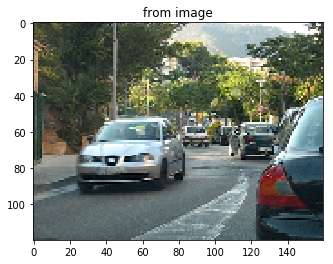

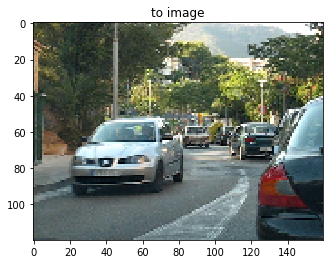

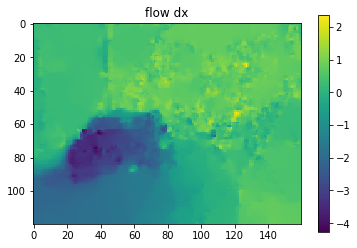

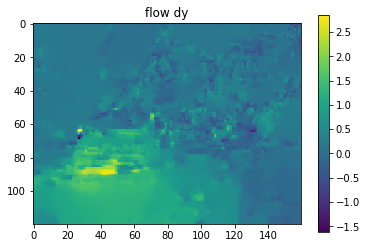

mean and std flow:  1.0132337358 0.84783580961


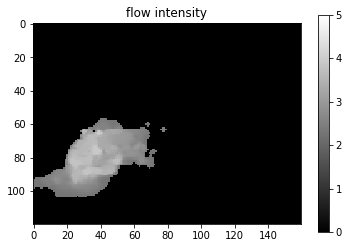

In [5]:
print("image shape: ",flow.shape)
import matplotlib.pyplot as plt
import matplotlib

plt.imshow(im1)
plt.title("from image")
plt.figure()
plt.imshow(im2)
plt.title("to image")

plt.figure()
plt.imshow(flow[:,:,0])
plt.colorbar()
plt.title("flow dx")

plt.figure()
plt.imshow(flow[:,:,1])
plt.colorbar()
plt.title("flow dy")
plt.show()

# show only the intensity
flow_intensity=np.sqrt(flow[:,:,0]**2+flow[:,:,1]**2)
flow_mean=np.mean(flow_intensity)
flow_std=np.std(flow_intensity)
print("mean and std flow: ",flow_mean,flow_std)
flow_intensity[flow_intensity<flow_mean+flow_std*1.5]=0

from  skimage import morphology

flow_intensity=morphology.opening(flow_intensity)
plt.figure()
plt.imshow(flow_intensity,cmap='gray',vmin=0,vmax=5)
plt.colorbar()
plt.title("flow intensity")
plt.show()




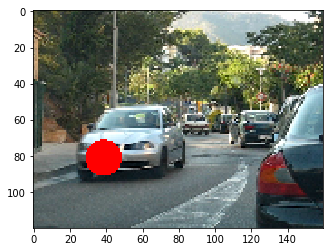

In [24]:
from skimage.draw import circle

indices=np.argwhere(flow_intensity)
position=np.mean(indices,axis=0)
x,y=position

color=np.array([1.0,0,0])
im_annotated=np.copy(im1)
radius=10
rr,cc=circle(x,y,radius,shape=im_annotated.shape)
im_annotated[rr,cc,:]=color
plt.imshow(im_annotated)
plt.show()

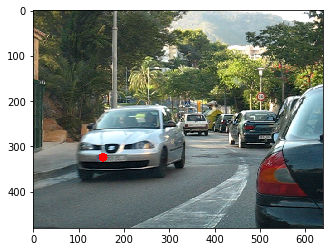

In [26]:

def map_coordinates(positions,shapeA,shapeB):
    shapeA=np.array(shapeA)
    shapeB=np.array(shapeB)
    factor=shapeB/shapeA
    return positions * factor 
    
position_original=map_coordinates(position,im1.shape[0:2],im1_original.shape[0:2])

x,y=position_original
im1_original_annotated=np.copy(im1_original)
rr,cc=circle(x,y,radius,shape=im1_original_annotated.shape)
im1_original_annotated[rr,cc,:]=color
plt.imshow(im1_original_annotated)
plt.show()